## Best Practices for Data Preprocessing

#### Always Explore & Visualize Data First

              ID       Age Gender        Income Purchased    Rating  \
count   7.000000   6.00000      6      6.000000         7  6.000000   
unique       NaN       NaN      2           NaN         2       NaN   
top          NaN       NaN   Male           NaN       Yes       NaN   
freq         NaN       NaN      3           NaN         4       NaN   
mean    4.000000  30.00000    NaN  62500.000000       NaN  4.350000   
std     2.160247   6.60303    NaN  12292.273996       NaN  0.423084   
min     1.000000  22.00000    NaN  50000.000000       NaN  3.800000   
25%     2.500000  25.75000    NaN  53500.000000       NaN  4.050000   
50%     4.000000  29.00000    NaN  59000.000000       NaN  4.350000   
75%     5.500000  33.75000    NaN  71250.000000       NaN  4.650000   
max     7.000000  40.00000    NaN  80000.000000       NaN  4.900000   

          JoinDate  
count            7  
unique           7  
top     2023-01-15  
freq             1  
mean           NaN  
std            NaN  


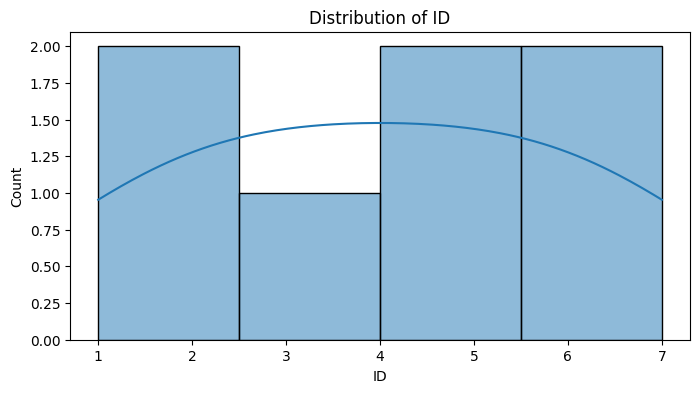

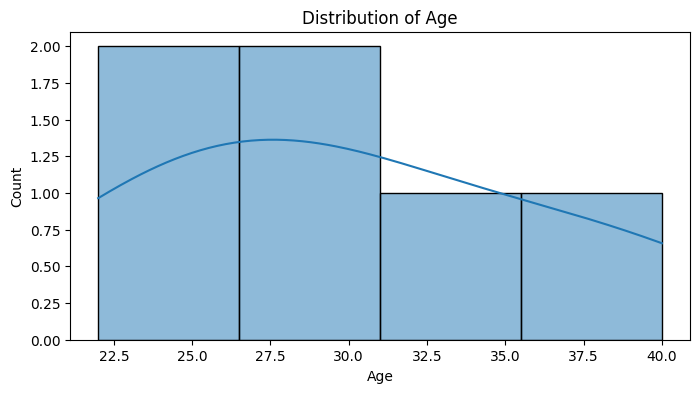

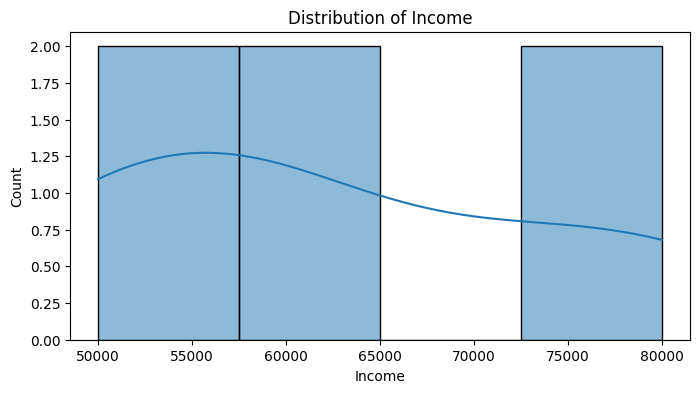

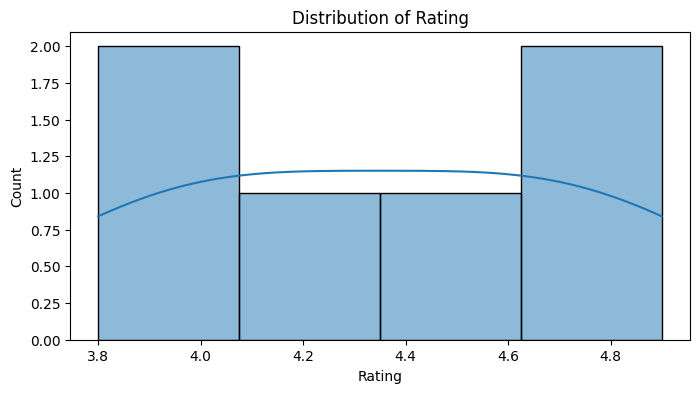

ID           0
Age          1
Gender       1
Income       1
Purchased    0
Rating       1
JoinDate     0
dtype: int64


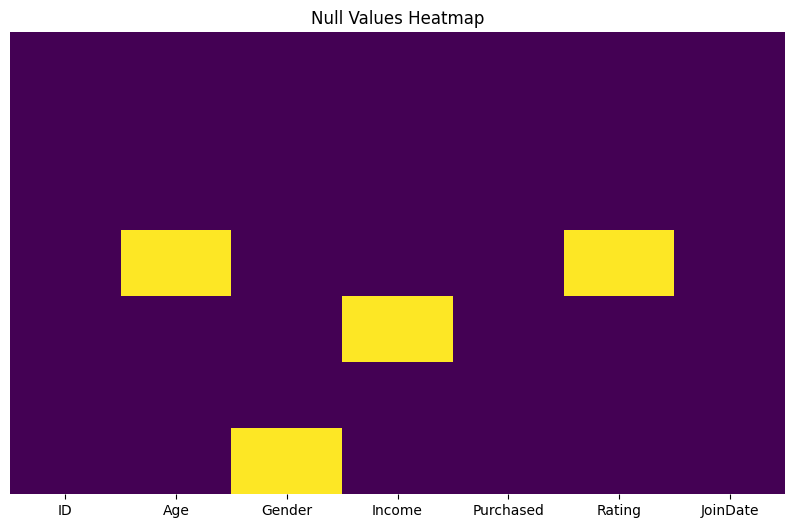

In [4]:
# Task 1: Summary Statistics
import pandas as pd

# Load your dataset
df = pd.read_csv('/workspaces/AI_DATA_ANALYSIS_/src/Module 6/Automating Data Cleaning and Best Practices in Data Preprocessing/sample_data.csv')

# Get summary statistics
summary_stats = df.describe(include='all')
print(summary_stats)





# Task 2: Visualize Data Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# For numeric columns: histogram + KDE plot
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()




# Task 3: Checking for Null Values

# Check total nulls per column
null_counts = df.isnull().sum()
print(null_counts)

# Visualize nulls using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Null Values Heatmap')
plt.show()




In [ ]:
import pandas as pd
import numpy as np

data = {
    'ID': [1, 2, 3, 4, 5, 6, 7],
    'Age': [25, 30, 22, np.nan, 28, 35, 40],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', np.nan],
    'Income': [50000, 60000, 52000, 58000, np.nan, 75000, 80000],
    'Purchased': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'Rating': [4.5, 3.8, 4.0, np.nan, 4.2, 4.7, 4.9],
    'JoinDate': pd.to_datetime(['2023-01-15', '2022-07-30', '2023-03-10', '2021-11-20',
                               '2022-05-14', '2023-04-01', '2021-12-12'])
}

df = pd.DataFrame(data)
df.to_csv('sample_data.csv', index=False)


## Handle Missing & Inconsistent Data Before Applying ML Models

In [7]:
# Task 4: Drop Missing Values

# Drop rows with any null values
df_dropped = df.dropna()

print("Data after dropping rows with missing values:")
print(df_dropped)




# Task 5: Fill Missing Values


numeric_cols = ['Age', 'Income', 'Rating']
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)


df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

print("Data after filling missing values:")
print(df)




# Task 6: Handling Outliers with Capping

def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    lower_limit = series.quantile(lower_quantile)
    upper_limit = series.quantile(upper_quantile)
    return series.clip(lower=lower_limit, upper=upper_limit)

# Apply capping to numeric columns
for col in numeric_cols:
    df[col] = cap_outliers(df[col])

print("Data after outlier capping:")
print(df)




Data after dropping rows with missing values:
   ID   Age  Gender   Income Purchased  Rating    JoinDate
0   1  25.0    Male  50000.0       Yes    4.50  2023-01-15
1   2  30.0  Female  60000.0        No    3.80  2022-07-30
2   3  22.0  Female  52000.0       Yes    4.00  2023-03-10
3   4  29.0    Male  58000.0        No    4.35  2021-11-20
4   5  28.0  Female  59000.0       Yes    4.20  2022-05-14
5   6  35.0    Male  75000.0        No    4.70  2023-04-01
6   7  40.0  Female  80000.0       Yes    4.90  2021-12-12
Data after filling missing values:
   ID   Age  Gender   Income Purchased  Rating    JoinDate
0   1  25.0    Male  50000.0       Yes    4.50  2023-01-15
1   2  30.0  Female  60000.0        No    3.80  2022-07-30
2   3  22.0  Female  52000.0       Yes    4.00  2023-03-10
3   4  29.0    Male  58000.0        No    4.35  2021-11-20
4   5  28.0  Female  59000.0       Yes    4.20  2022-05-14
5   6  35.0    Male  75000.0        No    4.70  2023-04-01
6   7  40.0  Female  80000.0      

## Choose the Right Scaling Method

In [10]:
# Task 7: Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Select numeric columns
numeric_cols = ['Age', 'Income', 'Rating']

# Fit and transform
df_minmax_scaled = df.copy()
df_minmax_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Min-Max Scaled Data:")
print(df_minmax_scaled[numeric_cols])







# Task 8: Robust Scaling

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df_robust_scaled = df.copy()
df_robust_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Robust Scaled Data:")
print(df_robust_scaled[numeric_cols])





# Task 9: MaxAbs Scaling

from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

df_maxabs_scaled = df.copy()
df_maxabs_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("MaxAbs Scaled Data:")
print(df_maxabs_scaled[numeric_cols])





Min-Max Scaled Data:
        Age    Income    Rating
0  0.134615  0.000000  0.653061
1  0.455128  0.336918  0.000000
2  0.000000  0.050179  0.142857
3  0.391026  0.265233  0.500000
4  0.326923  0.301075  0.346939
5  0.775641  0.874552  0.857143
6  1.000000  1.000000  1.000000
Robust Scaled Data:
        Age  Income  Rating
0 -0.666667  -0.672    0.30
1  0.166667   0.080   -0.98
2 -1.016667  -0.560   -0.70
3  0.000000  -0.080    0.00
4 -0.166667   0.000   -0.30
5  1.000000   1.280    0.70
6  1.583333   1.560    0.98
MaxAbs Scaled Data:
        Age    Income    Rating
0  0.649351  0.644586  0.929752
1  0.779221  0.764331  0.797521
2  0.594805  0.662420  0.826446
3  0.753247  0.738854  0.898760
4  0.727273  0.751592  0.867769
5  0.909091  0.955414  0.971074
6  1.000000  1.000000  1.000000


## Keep Track of Data Transformations for Reproducibility

In [12]:
# Task 10: Log Data Preprocessing Steps


def log_step(message, filename='preprocessing_log.txt'):
    with open(filename, 'a') as f:
        f.write(message + '\n')

# Example usage logging some steps:
log_step("Started data preprocessing.")
log_step("Dropped missing values from dataset.")
log_step("Filled missing values with median/mode.")
log_step("Applied Winsorization for outlier capping.")
log_step("Performed Min-Max Scaling on numeric columns.")
log_step("Performed Robust Scaling on numeric columns.")
log_step("Performed MaxAbs Scaling on numeric columns.")
log_step("Completed data preprocessing.")




# Task 11: Store Transformation Parameters


import joblib

# Example: Saving the fitted MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[numeric_cols])

# Save scaler to a file
joblib.dump(scaler, 'minmax_scaler.joblib')

# Later: Load scaler back
loaded_scaler = joblib.load('minmax_scaler.joblib')

# You can use loaded_scaler.transform(new_data) to apply the same scaling


